In [4]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [5]:
with open('wine_data_long.pkl', 'rb') as picklefile: 
    wine_data = pickle.load(picklefile)

In [7]:
wine_data.head()

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
0,4.298089,Veuve Clicquot,Brut (Carte Jaune) Champagne,N.V.,Sparkling wine,Champagne,France,98089,49.99
1,4.186996,Moët & Chandon,Impérial Brut Champagne,N.V.,Sparkling wine,Champagne,France,86996,error
2,3.767923,Casal Garcia,Vinho Verde Branco,N.V.,White wine,Vinho Verde,Portugal,67923,error
3,4.352852,Farnese,Edizione Cinque Autoctoni,N.V.,Red wine,Abruzzo,Italy,52852,error
4,3.847404,Piccini,Memoro Rosso,N.V.,Red wine,Toscana,Italy,47404,10.99


In [8]:
wine_data.tail()

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
1444,3.63780,Louis Jadot,Bourgogne Pinot Noir,2015,Red wine,Bourgogne,France,3780,error
1445,4.03780,Enzo Bartoli,Barbera d’Asti Superiore,2017,Red wine,Barbera d'Asti,Italy,3780,16.8
1446,3.63780,Dark Horse,Cabernet Sauvignon,2016,Red wine,California,United States,3780,error
1447,4.63778,Vega Sicilia,Valbuena 5º,2013,Red wine,Ribera del Duero,Spain,3778,error
1448,4.73775,Cartuxa,Pêra-Manca Tinto,2011,Red wine,Alentejo,Portugal,3775,324.5


In [13]:
wine_data_clean = wine_data[wine_data['Average Price'] != 'error']

In [18]:
wine_data_clean.describe()

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
count,454,454,454,454,454,454,454,454,454
unique,454,249,261,21,5,108,15,431,245
top,3.83858,Familia Torres,Cabernet Sauvignon,2015,Red wine,Mendoza,Italy,3812,14.99
freq,1,11,22,71,388,45,99,3,15


In [19]:
wine_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 1448
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Average Rating     454 non-null    object
 1   Winery             454 non-null    object
 2   Wine Name          454 non-null    object
 3   Vintage            454 non-null    object
 4   Type               454 non-null    object
 5   Region             454 non-null    object
 6   Country            454 non-null    object
 7   Number of Reviews  454 non-null    object
 8   Average Price      454 non-null    object
dtypes: object(9)
memory usage: 35.5+ KB


In [21]:
wine_data_clean_smaller = wine_data_clean.loc[:,['Average Rating', 'Vintage', 'Type',
                                                 'Country', 'Number of Reviews', 
                                                'Average Price']]

In [22]:
wine_data_clean_smaller.describe()

,Average Rating,Vintage,Type,Country,Number of Reviews,Average Price
count,454,454,454,454,454,454
unique,454,21,5,15,431,245
top,3.83858,2015,Red wine,Italy,3812,14.99
freq,1,71,388,99,3,15


In [23]:
wine_data_clean_smaller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Average Rating     454 non-null    object
 1   Vintage            454 non-null    object
 2   Type               454 non-null    object
 3   Country            454 non-null    object
 4   Number of Reviews  454 non-null    object
 5   Average Price      454 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


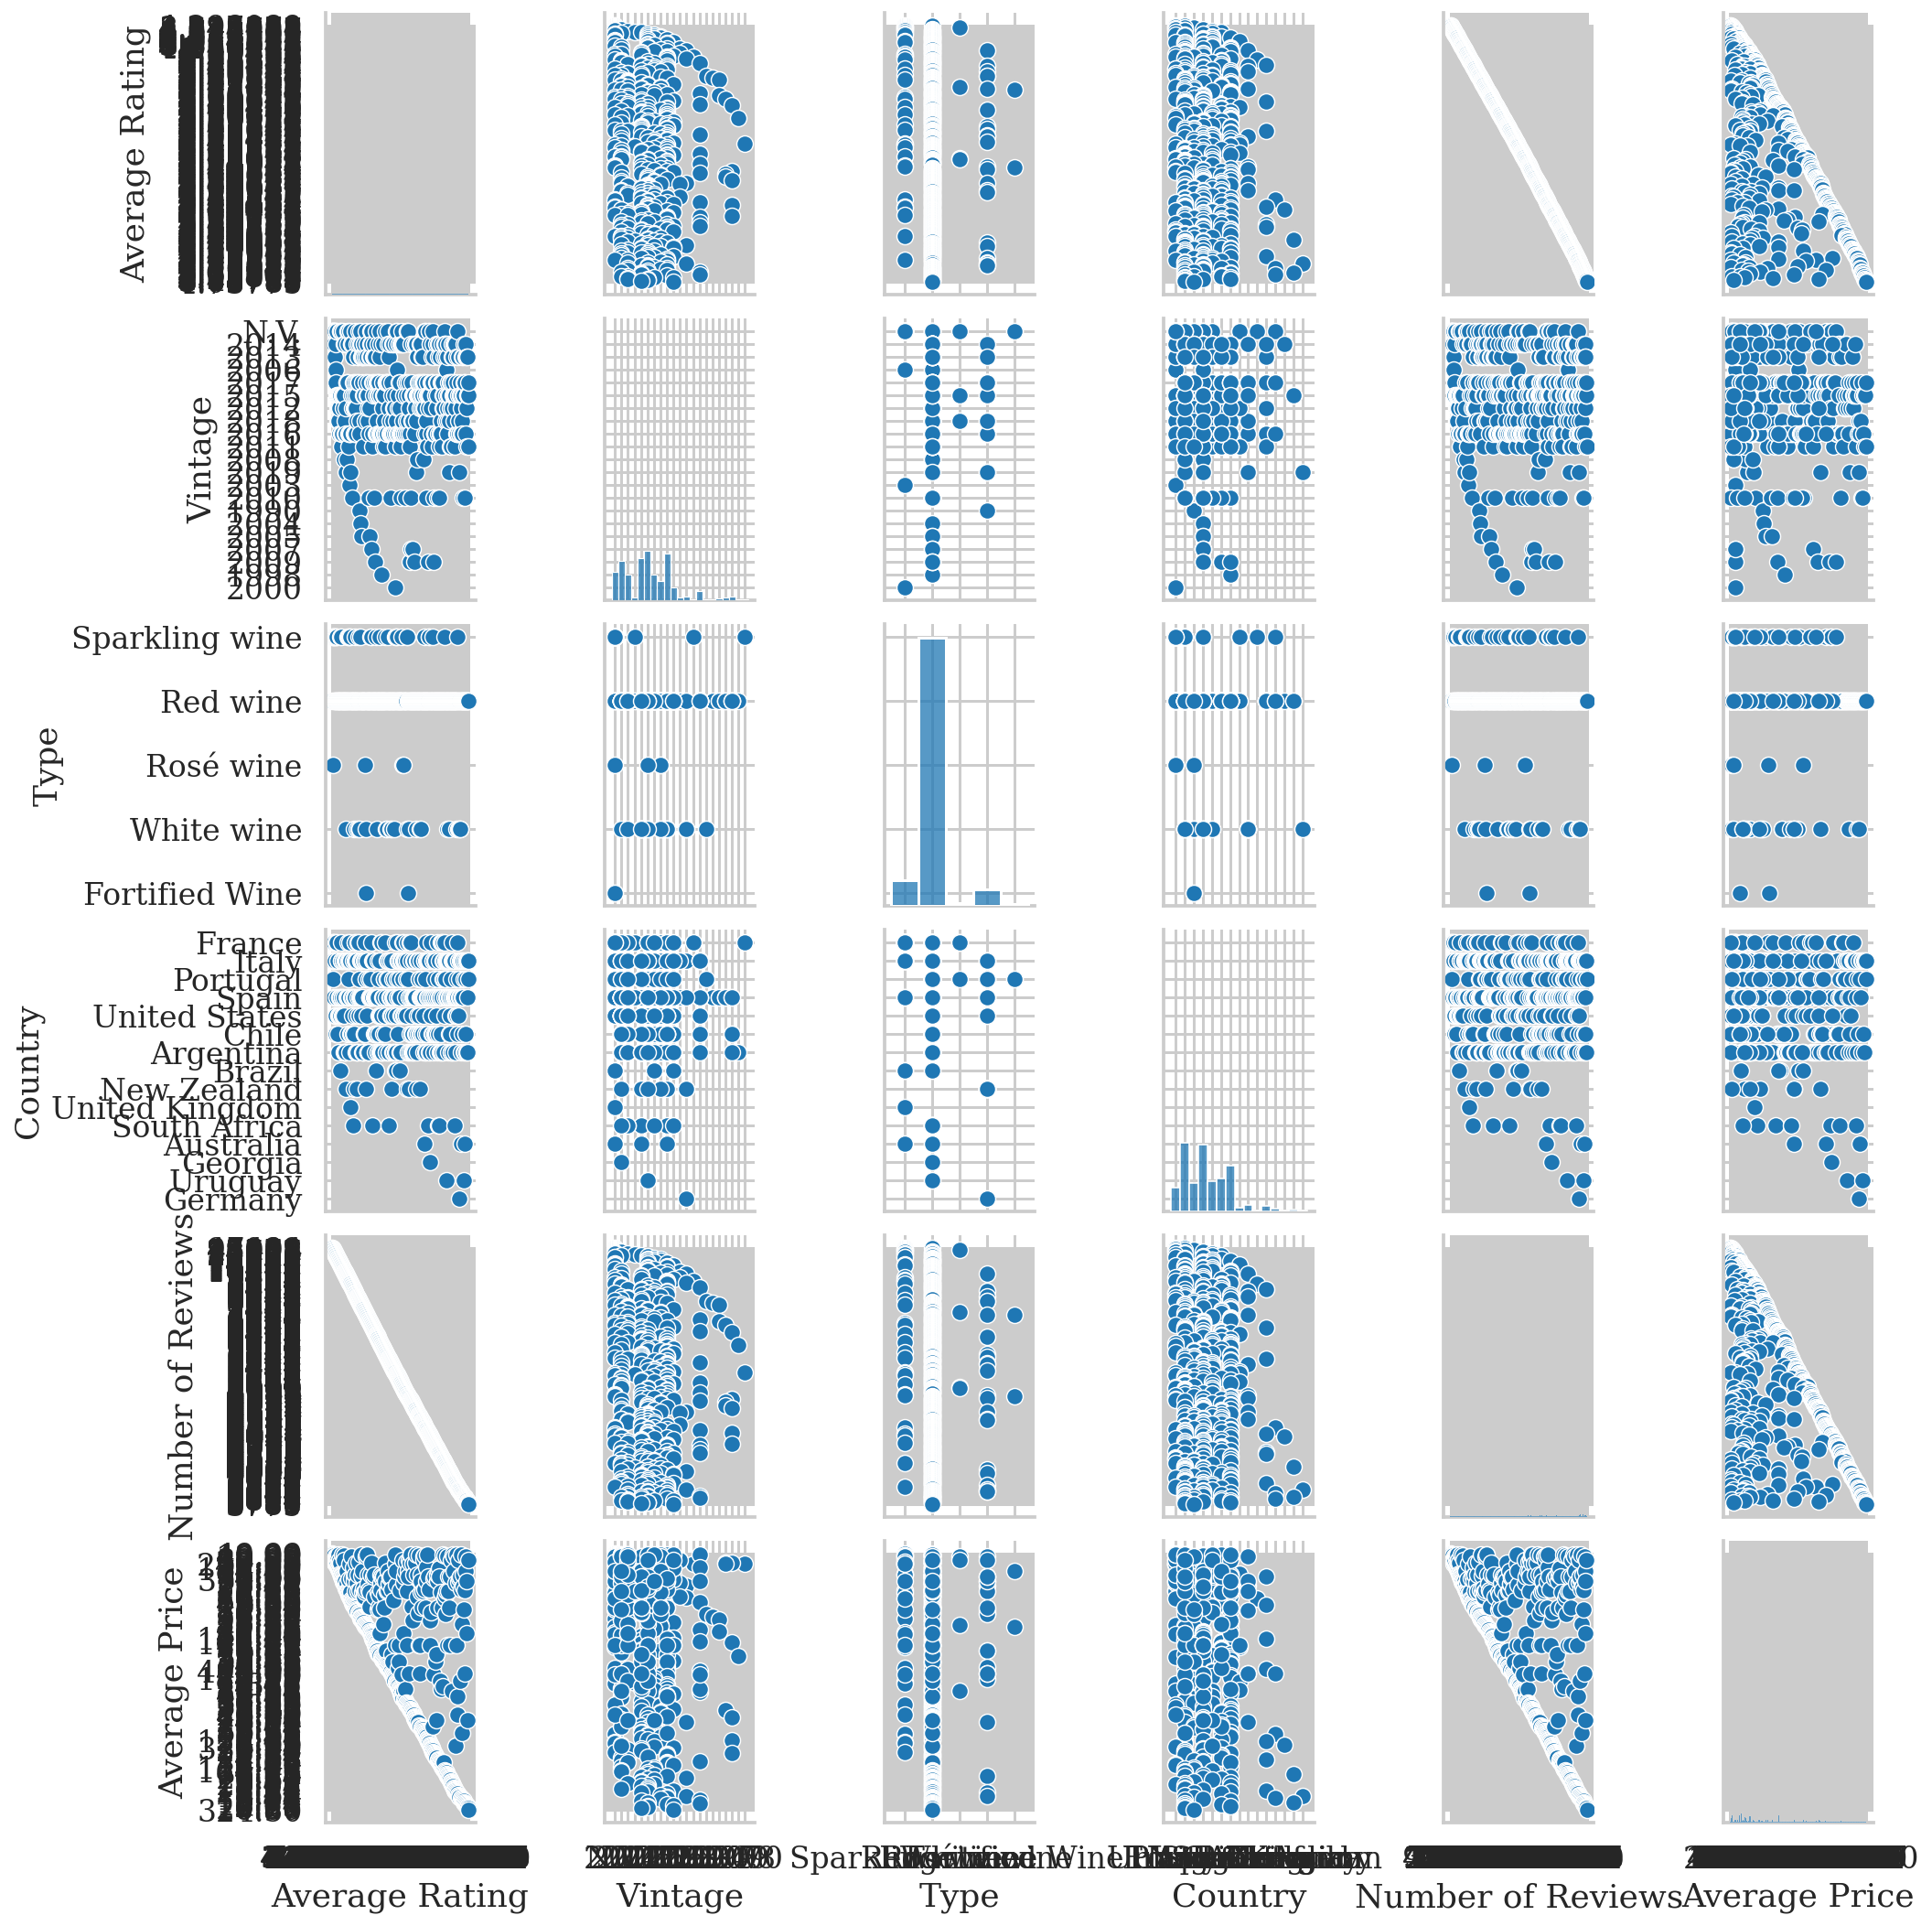

In [29]:
sns.pairplot(wine_data_clean_smaller, 
            x_vars=['Average Rating', 'Vintage', 'Type',
                    'Country', 'Number of Reviews', 
                    'Average Price'],
            y_vars=['Average Rating', 'Vintage', 'Type',
                    'Country', 'Number of Reviews', 
                    'Average Price']
)

In [41]:
wine_data_clean_smaller = wine_data_clean_smaller[wine_data_clean_smaller['Vintage'] != 'N.V.']

In [56]:
wine_data_clean_smaller['Average Rating'] = wine_data_clean_smaller['Average Rating'].astype(float)
wine_data_clean_smaller['Number of Reviews'] = wine_data_clean_smaller['Number of Reviews'].astype(int)
wine_data_clean_smaller['Average Price'] = wine_data_clean_smaller['Average Price'].astype(float)
wine_data_clean_smaller['Vintage'] = wine_data_clean_smaller['Vintage'].astype(int)

<ipython-input-56-73ac48f1604d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean_smaller['Average Rating'] = wine_data_clean_smaller['Average Rating'].astype(float)
<ipython-input-56-73ac48f1604d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean_smaller['Number of Reviews'] = wine_data_clean_smaller['Number of Reviews'].astype(int)
<ipython-input-56-73ac48f1604d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [57]:
wine_data_clean_smaller.dtypes

Average Rating       float64
Vintage                int64
Type                  object
Country               object
Number of Reviews      int64
Average Price        float64
dtype: object

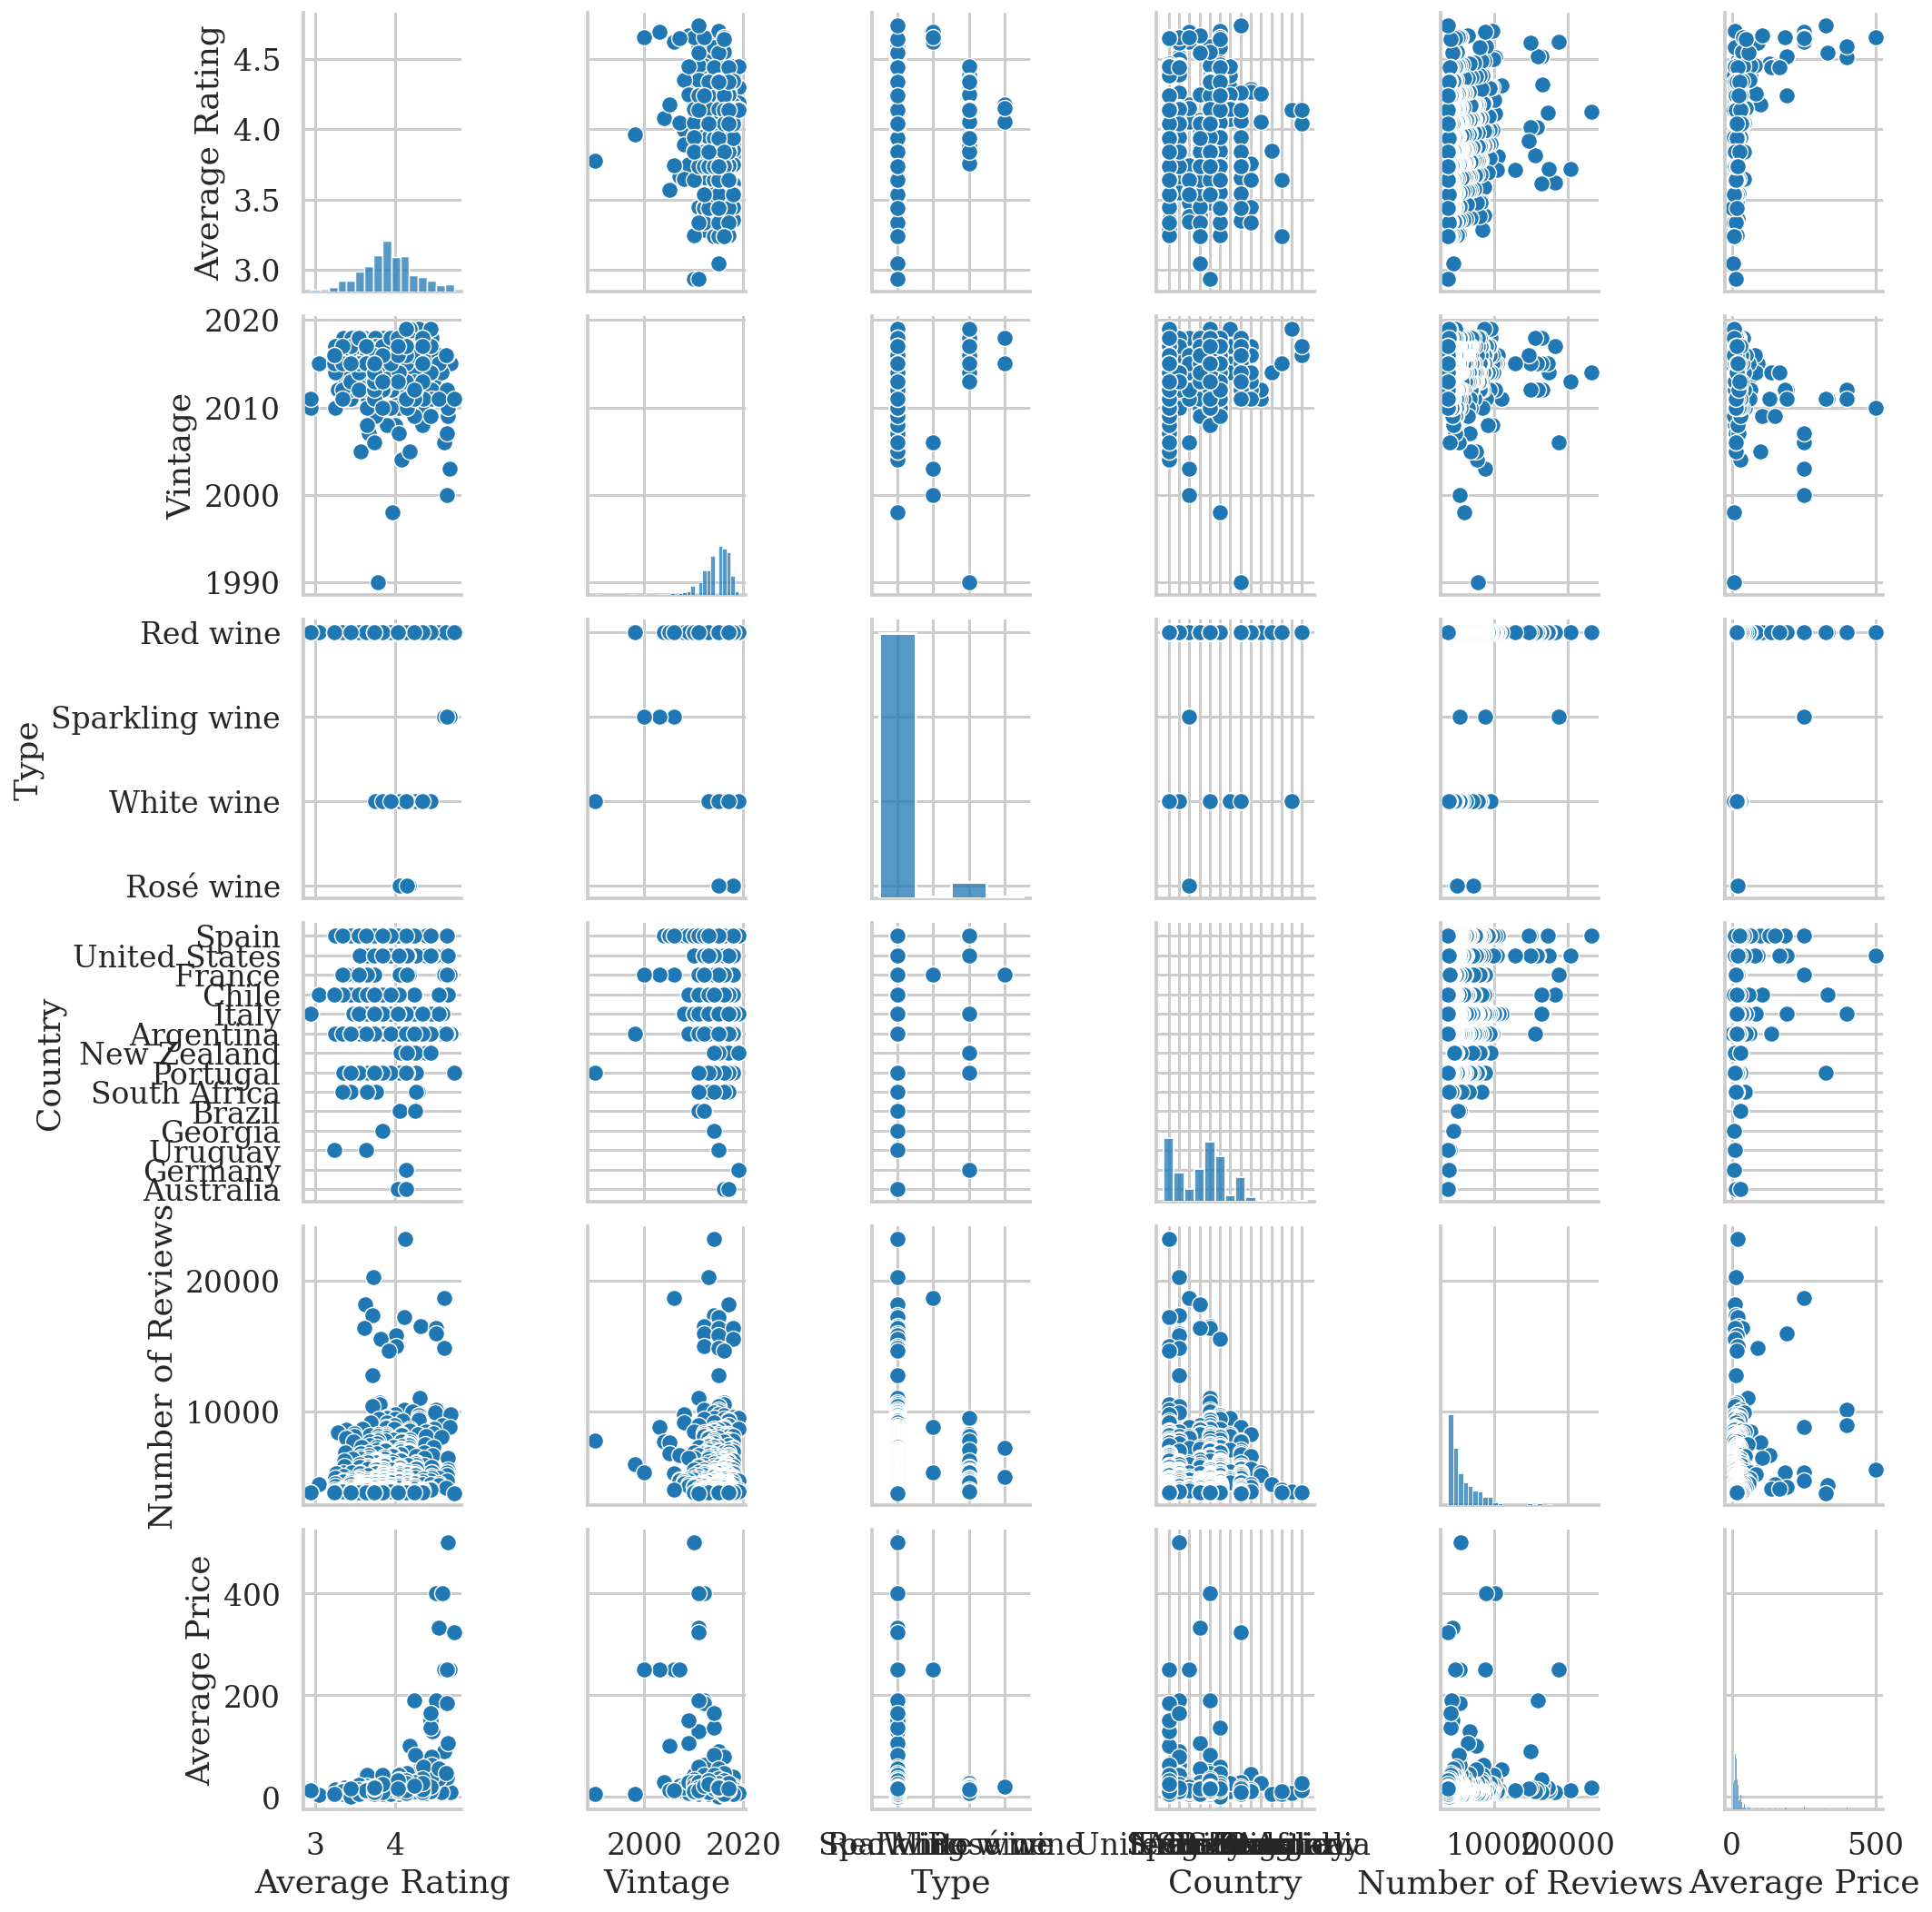

In [58]:
sns.pairplot(wine_data_clean_smaller, 
            x_vars=['Average Rating', 'Vintage', 'Type',
                    'Country', 'Number of Reviews', 
                    'Average Price'],
            y_vars=['Average Rating', 'Vintage', 'Type',
                    'Country', 'Number of Reviews', 
                    'Average Price']
)

In [61]:
X1 = wine_data_clean_smaller.loc[:,'Average Price'].values.reshape(-1, 1)
y1 = wine_data_clean_smaller.loc[:,'Average Rating']

linreg_model = LinearRegression()
linreg_model.fit(X1, y1)

LinearRegression()

In [62]:
linreg_model.coef_

array([0.0030779])

In [63]:
linreg_model.intercept_

3.8318511348027555

In [68]:
linreg_model.predict([[20]])

array([3.89340905])

In [69]:
linreg_model.predict([[100]])

array([4.13964074])